In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading in the datafile
filepath = './datasets/bs140513_032310.csv' # change the file path 
df = pd.read_csv(filepath)

# Understanding the Data

In [3]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


There are 10 colums of data. 

In [4]:
df.dropna()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [5]:
print(any(df['customer'].duplicated()))


True


This dataset contains duplicate customer id's. It means that we can analyze individual customer transactions.

In [6]:
df['amount'].describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

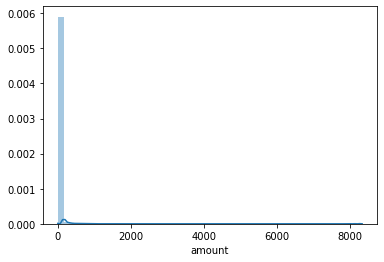

In [7]:
sns.distplot(df.amount) # title chart

Mean amount of all the transactions is about 38. On the other side, standard deviation is large and is about 111.

This visualization shows that most of the transactions are not that significant, the data is skewed to the right

In [8]:
df['age'].describe()

count     594643
unique         8
top          '2'
freq      187310
Name: age, dtype: object

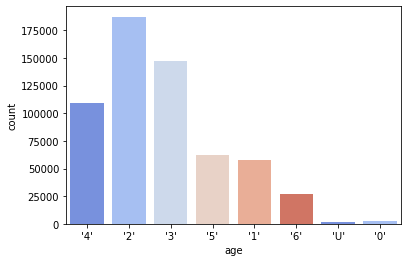

In [9]:
sns.countplot(x='age', data=df, palette=sns.color_palette("coolwarm")) # title

The most common data age group is 2nd, which according to the original paper is group 26-35.

Second most popular is 36-45

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

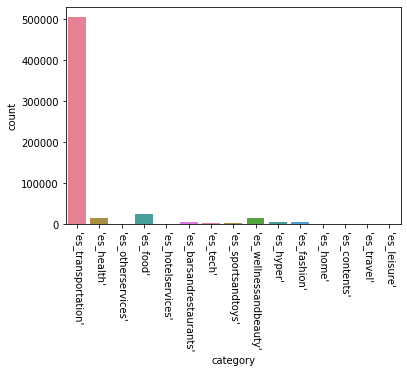

In [10]:
sns.countplot(x='category', data=df, palette=sns.color_palette("husl"))
plt.xticks(rotation=-90) # title (category vs count)

Countplot of different transaction categories.

Most of the transactions are within transportation

In [11]:
fraud = df[df.fraud != 0]
fraud.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
88,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
89,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
434,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
435,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
553,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

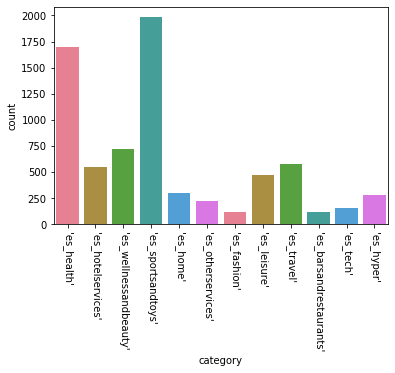

In [12]:
sns.countplot(x='category', data=fraud, palette=sns.color_palette("husl")) #if possible, arrange graph in decreasing order
plt.xticks(rotation=-90) # title (category vs count (fraud)) # maybe change to proportions?

However if we look only into fraudulent data, most popular category seems to be sports and toys, and second largest is health.

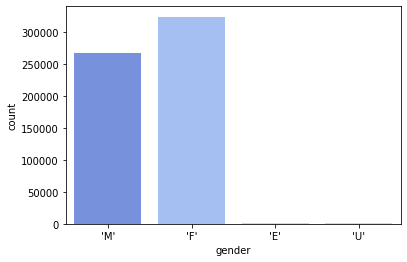

In [13]:
sns.countplot(x='gender', data=df, palette=sns.color_palette("coolwarm")) # title 
# (M vs F (fraud)), maybe change to proportions?

In [14]:
df.groupby(['gender']).amount.mean()

gender
'E'    36.627623
'F'    39.213044
'M'    36.308094
'U'    31.508932
Name: amount, dtype: float64

In [15]:
df.groupby(['gender']).fraud.mean()

gender
'E'    0.005942
'F'    0.014660
'M'    0.009073
'U'    0.000000
Name: fraud, dtype: float64

In this dataset females spend more money and these transactions are more likely to be fraudulent than other groups, however we nee to keep in mind that there is more female data in our dataset

In [16]:
fraud_merchant = fraud.groupby(['merchant'])
fraud_merchant.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
88,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
89,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
434,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
435,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
553,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1
...,...,...,...,...,...,...,...,...,...,...
178913,62,'C1564260047','3','F','28007','M348875670','28007','es_hotelservices',321.46,1
300134,98,'C1350963410','5','F','28007','M933210764','28007','es_sportsandtoys',696.90,1
381976,121,'C1835412106','2','F','28007','M348875670','28007','es_hotelservices',145.84,1
381977,121,'C932908444','1','F','28007','M348875670','28007','es_hotelservices',0.80,1
